#### [개발 주제: 길에 따른 생선 무게 예측 모델]
- 데이터 셋 : fish.csv
	* 피처/특성/데이터 : 길이 Length 컬럼
	* 타겟/정답/레이블 : 무게 weight 컬럼
- 학습종류 : 지도학습  

[1] 모듈 로딩 및 데이터 준비 <hr>

In [87]:
# [1-1]  모듈로딩 	- 데이터 분석용
import pandas as pd
import matplotlib.pyplot as plt


In [88]:
# [1-2] 데이터 준비
Data_file = '../Data/fish.csv'

In [89]:
# 데이터 로딩
# 농어 생선의 무게 와 길이
# skipfooter , skiprows , usecols
fish_df =  pd.read_csv(Data_file, skiprows=73, header=None, skipfooter=31, engine='python', usecols=[1,2])

In [90]:
fish_df

,1,2
0,300.0,26.0
1,5.9,8.4
2,32.0,13.7
3,40.0,15.0
4,51.5,16.2
5,70.0,17.4
6,100.0,18.0
7,78.0,18.7
8,80.0,19.0
9,85.0,19.6


# [2] 데이터 분석 - 탐색적 분석 <hr>

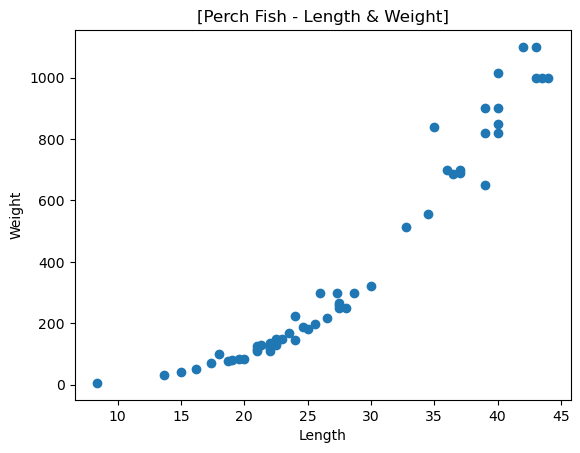

In [91]:
## 무게와 길이의 분표 시각화
plt.plot(fish_df[2],fish_df[1], 'o')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('[Perch Fish - Length & Weight]')
plt.show()

- 길이와 무게는 선형의 분포
- 길이에 따른 무게를 예측하기 위한 알고리즘으로 선형 모델 선정
- 학습 알고리즘 ==> LinearRegression  진행

# [3] 학습진행 <hr>

In [92]:
# 학습관련 모듈 로딩

from sklearn.linear_model import LinearRegression						# ML 알고리즘 모듈
from sklearn.metrics import mean_squared_error, mean_absolute_error		# 성능평가 관련 모듈
from sklearn.model_selection import train_test_split					# 데이터셋 분리 관련 모듈






In [93]:
# [3-1] 데이터셋 준비 => 학습용, 검증용, 테스트용
# - 학습용 : 모델 학습 즉, 규칙과 패턴 찾기 위해 사용되는 데이터셋
# - 검증용 : 모델 학습 진행이 제대로 되고 있는지 확인용 데이터셋
# - 테스트용 : 학습 완료 후 검사용 데이터셋


# - 전체 데이터셋 => 학습용 : 테스트용 = 70:30 또는 80 : 20

featureDF = fish_df[[2]]
targetSR = fish_df[1]

print(f'featureDF => {featureDF.ndim}D targetSR => {targetSR.ndim}D')



featureDF => 2D targetSR => 1D


In [94]:
# 학습용 : 테스트용 => 80:20
X_train, X_test, y_train, y_test = train_test_split(featureDF,targetSR,test_size=0.2, random_state=10)


print(f'X_train => {X_train.shape},  X_test => {X_test.shape}')
print(f'y_train => {y_train.shape},  y_test => {y_test.shape}')


X_train => (45, 1),  X_test => (12, 1)
y_train => (45,),  y_test => (12,)


In [95]:
# 학습용 : 검증용 => 80:20
X_train, X_val, y_train, y_val = train_test_split(X_train,\
													y_train,\
													test_size=0.2,\
													random_state=10)


print(f'X_train => {X_train.shape}, X_val => {X_val.shape} ,X_test => {X_test.shape}')
print(f'y_train => {y_train.shape}, y_val => {y_val.shape}, y_test => {y_test.shape}')

X_train => (36, 1), X_val => (9, 1) ,X_test => (12, 1)
y_train => (36,), y_val => (9,), y_test => (12,)


In [96]:
# [3-2] 학습 진행 => 알고리즘 객체 생성


fishModel = LinearRegression()

In [97]:
# [3-3] 학습 진행 => 학습용 데이터셋 사용
fishModel.fit(X_train,y_train)

LinearRegression()

In [98]:
# => 모델 파라미터 확인
print(f'fishModel.coef_ {fishModel.coef_},fishModel.intercept_ {fishModel.intercept_}')


fishModel.coef_ [38.09694781],fishModel.intercept_ -675.2405807526626


# [4] 학습평가
	- 성능평가 : 모델이 적합한 모델인가를 평가
	- 손실 계산 : 잔차/오차 발생정도 확인


In [99]:
# [4-1] 성능 평가 : 모델 적합도 => 검증용 데이터셋
score = fishModel.score(X_val,y_val)

print(f'모델 성능 평가 {score}')

모델 성능 평가 0.9384216586426708


In [102]:
# [4-2] 손실계산 : 검증용 데이터셋으로 예측값 추출 ==> 손실계산
pre_y = fishModel.predict(X_val)


mse = mean_squared_error(y_val, pre_y)
mae = mean_absolute_error(y_val, pre_y)

print(f'mean_squared_error : {mse}, mean_absolute_error : {mae}')

mean_squared_error : 8981.543188862888, mean_absolute_error : 75.42310066866345


# [5] 예측 서비스 <hr>

#### 테스트용 데이터셋으로 진행

In [103]:
pre_y = fishModel.predict(X_test)

print(f'예측길이 : {pre_y}')

예측길이 : [ 334.32853611 -103.78636366  372.42548392  261.94433528  181.94074489
  162.89227098  734.34648807 -153.31239581  200.98921879  239.08616659
  372.42548392  467.66785343]
